In [52]:
# pip install kneed

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MeanShift
from numpy import unique
from sklearn.cluster import  estimate_bandwidth

In [54]:
data = pd.read_csv('diabetes.csv', usecols=['Glucose', 'BloodPressure'])
data.head(5)

,Glucose,BloodPressure
0,148,72
1,85,66
2,183,64
3,89,66
4,137,40


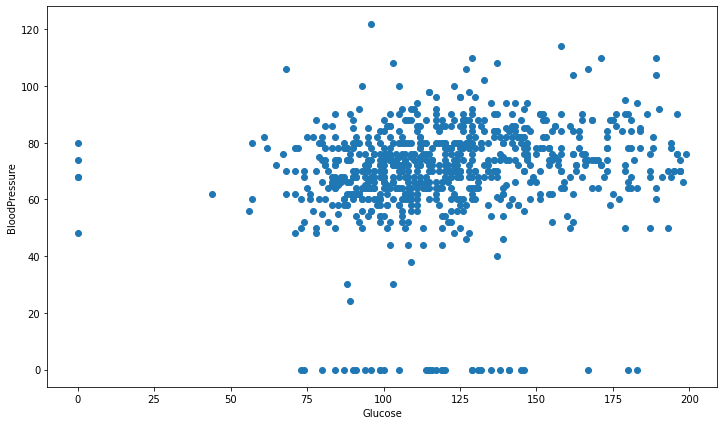

In [55]:
# ploting before clustering

plt.figure(figsize=(12,7))
plt.scatter(data['Glucose'], data['BloodPressure'])
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.show()

In [56]:
meanshift = MeanShift()
y_meanshift = meanshift.fit_predict(data)
y_meanshift

array([0, 0, 3, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 3, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 1, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3,

In [57]:
n_cluster = unique(y_meanshift)
n_cluster

array([0, 1, 2, 3])

In [58]:
# find the data points whnich is belong the cluster 0:
data[y_meanshift==0].head()

,Glucose,BloodPressure
0,148,72
1,85,66
3,89,66
4,137,40
5,116,74


In [59]:
data['Cluster_Label'] = y_meanshift
data.head()

,Glucose,BloodPressure,Cluster_Label
0,148,72,0
1,85,66,0
2,183,64,3
3,89,66,0
4,137,40,0


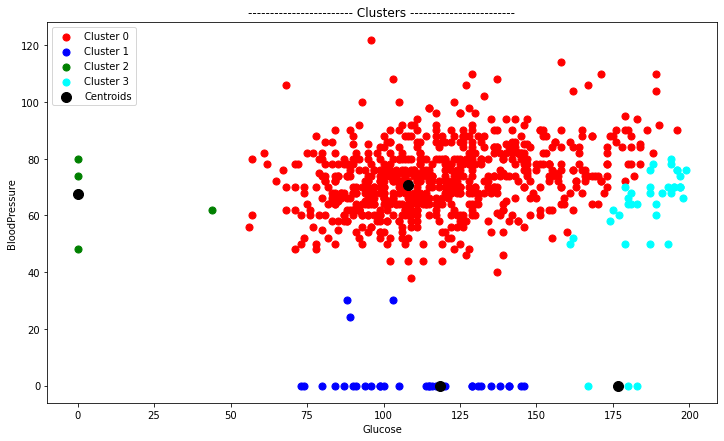

In [60]:
plt.figure(figsize=(12,7))
plt.scatter(data[y_meanshift == 0]['Glucose'], data[y_meanshift == 0]['BloodPressure'], s=50, c='red', label='Cluster 0')
plt.scatter(data[y_meanshift == 1]['Glucose'], data[y_meanshift == 1]['BloodPressure'], s=50, c='blue', label ='Cluster 1')
plt.scatter(data[y_meanshift == 2]['Glucose'], data[y_meanshift == 2]['BloodPressure'], s=50, c='green', label ='Cluster 2')
plt.scatter(data[y_meanshift == 3]['Glucose'], data[y_meanshift == 3]['BloodPressure'], s=50, c='cyan', label ='Cluster 3')
plt.scatter(meanshift.cluster_centers_[:, 0], meanshift.cluster_centers_[:, 1], s=100, c='black', label='Centroids')


plt.title('------------------------ Clusters ------------------------')
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.legend()
plt.show()

In [69]:
data = pd.read_csv('diabetes.csv', usecols=['Glucose', 'BloodPressure'])
data.head(5)

,Glucose,BloodPressure
0,148,72
1,85,66
2,183,64
3,89,66
4,137,40


In [70]:

bandwidth = estimate_bandwidth(data, quantile=0.2, n_samples=100)
bandwidth

23.97623959974526

In [71]:
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
y_meanshift = meanshift.fit_predict(data)
y_meanshift

array([0, 0, 3, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 3, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 1, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3,

In [72]:
n_cluster = unique(y_meanshift)
n_cluster

array([0, 1, 2, 3])

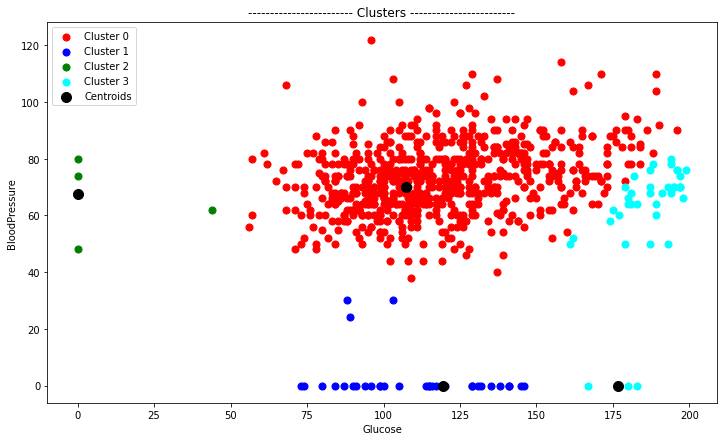

In [73]:
plt.figure(figsize=(12,7))
plt.scatter(data[y_meanshift == 0]['Glucose'], data[y_meanshift == 0]['BloodPressure'], s=50, c='red', label='Cluster 0')
plt.scatter(data[y_meanshift == 1]['Glucose'], data[y_meanshift == 1]['BloodPressure'], s=50, c='blue', label ='Cluster 1')
plt.scatter(data[y_meanshift == 2]['Glucose'], data[y_meanshift == 2]['BloodPressure'], s=50, c='green', label ='Cluster 2')
plt.scatter(data[y_meanshift == 3]['Glucose'], data[y_meanshift == 3]['BloodPressure'], s=50, c='cyan', label ='Cluster 3')
plt.scatter(meanshift.cluster_centers_[:, 0], meanshift.cluster_centers_[:, 1], s=100, c='black', label='Centroids')


plt.title('------------------------ Clusters ------------------------')
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.legend()
plt.show()